# Data Mining - assignment #1
## Third Approach: FP-Growth For Continuous Attributes (Min-Apriori version)

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import  association_rules
import matplotlib.pyplot as plt
from fpgrowth_continuous_min_apriori import fpgrowth_continuous_normalized

### Read true.csv file and label it with 1

In [2]:
true_df = pd.read_csv(r"True.csv", sep=',')
true_df['label'] = 1
true_df.sample(5)

,title,text,subject,date,label
3087,Republicans propose bill to privatize U.S. air...,WASHINGTON (Reuters) - The chairman of the U.S...,politicsNews,"June 21, 2017",1
8307,Trump returns to hardline position on illegal ...,PHOENIX (Reuters) - Republican presidential no...,politicsNews,"September 1, 2016",1
19672,Brazil's Temer at U.N. decries rise in nationa...,UNITED NATIONS (Reuters) - Brazilian President...,worldnews,"September 19, 2017",1
6053,Protesters vow to battle Trump's 'poor decisio...,"CANNON BALL, N.D. (Reuters) - Tribal leaders p...",politicsNews,"January 24, 2017",1
19838,Hamas says ready to hand Gaza to a Palestinian...,CAIRO/RAMALLAH (Reuters) - Hamas has agreed to...,worldnews,"September 17, 2017",1


### Read fake.csv file and label it with 0

In [3]:
fake_df = pd.read_csv(r"Fake.csv", sep=',') 
fake_df['label'] = 0
fake_df.sample(5)

,title,text,subject,date,label
9527,HAHA! WATCH DNC CHAIR PEREZ Try To Dodge Quest...,Democratic National Committee chairman Tom Per...,politics,"Nov 2, 2017",0
19059,VAN JONES Guarantees 8 Years Of President Trum...,Van Jones praised President Trump for honoring...,left-news,"Mar 1, 2017",0
4578,Fox News’ Latest Eye-Rolling Tweet Might Be T...,There s nothing quite like hypocrisy on the gr...,News,"September 18, 2016",0
22120,MASS INTEGRATION: The Race to Capitalize on a...,Randy Johnson 21st Century WireDigital technol...,US_News,"April 18, 2017",0
15664,(VIDEO) JUDGE NAPOLITANO FILLS US IN ON ORDER ...,,politics,"May 20, 2015",0


### Combine true and fake news in one dataframe

In [4]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
28805,Watch Glenn Beck’s BIZARRE Ritual With Child ...,Right wing radio host and pundit Glenn Beck ha...,News,"March 20, 2016",0
6296,Biden calls for Russia sanctions to stay as Tr...,KIEV (Reuters) - Outgoing U.S. Vice President ...,politicsNews,"January 16, 2017",1
44713,‘STRANGER THINGS’ – Hollywood MK Ultra Goes Fu...,Jay Dyer 21st Century WireThe popular 80s past...,Middle-east,"July 26, 2016",0
13390,Turkey's Vakifbank denies involvement in proce...,ISTANBUL (Reuters) - Turkey s Vakifbank said o...,worldnews,"December 1, 2017",1
35886,TOP DETECTIVES GIVE REASONS They Are Shocked N...,The drum beat keeps getting louder. More and m...,politics,"Feb 16, 2016",0
16452,North Korea's Kim congratulates China's Xi aft...,SEOUL (Reuters) - North Korean leader Kim Jong...,worldnews,"October 25, 2017",1
34408,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,politics,"Sep 17, 2016",0
4313,"May, Trump agree Russia should break ties with...",LONDON (Reuters) - British Prime Minister Ther...,politicsNews,"April 10, 2017",1
44207,Boiler Room EP #126 – Immigration Consternation,Tune in to the Alternate Current Radio Network...,Middle-east,"September 15, 2017",0
43669,Cheerleading Assassination: Are Hollywood and ...,21st Century Wire says Everyone has the right ...,US_News,"January 24, 2017",0


### Produce a Frequency-Term Table out of the dataframe

In [5]:
vectorizer = CountVectorizer(stop_words='english', min_df=1000, token_pattern=r'[a-zA-Z]{2,}')
matrix = vectorizer.fit_transform(all_news_df['title']+' '+all_news_df['text'])

In [6]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(10)

,abc,ability,able,absolutely,accept,access,according,account,accounts,accusations,...,written,wrong,wrote,year,years,yes,yesterday,york,young,youtube
38332,0,0,0,0,0,0,0,0,1,0,...,0,0,0,6,0,0,0,1,0,0
44628,0,0,0,0,0,2,3,0,0,0,...,0,0,0,0,2,0,0,2,0,0
32025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
11285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42402,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2261,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Produce Frequent Itemsets

In [7]:
freq_items = fpgrowth_continuous_normalized(sparse_df, min_support=0.2, use_colnames=True)
freq_items

,support,itemsets
0,1.000000,(youtube)
1,0.204266,"(youtube, screenshot)"
2,1.000000,(february)
3,1.000000,(federal)
4,0.247698,"(department, federal)"
...,...,...
3770,1.000000,(powerful)
3771,1.000000,(powers)
3772,1.000000,(prepared)
3773,1.000000,(politicians)


### List the top 20 popular words

In [8]:
word_counts = matrix.sum(axis=0).tolist()[0]
features = vectorizer.get_feature_names_out()
word_freq = dict(zip(features, word_counts))
top_20_freq_items = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
df_top20 = pd.DataFrame(top_20_freq_items, columns=['Word', 'Frequency'])
df_top20

,Word,Frequency
0,trump,149541
1,said,133033
2,president,57657
3,people,42496
4,state,35621
5,new,33113
6,obama,31491
7,clinton,30529
8,house,29756
9,reuters,29567


### Bar plot visualization of the 20 top popular words

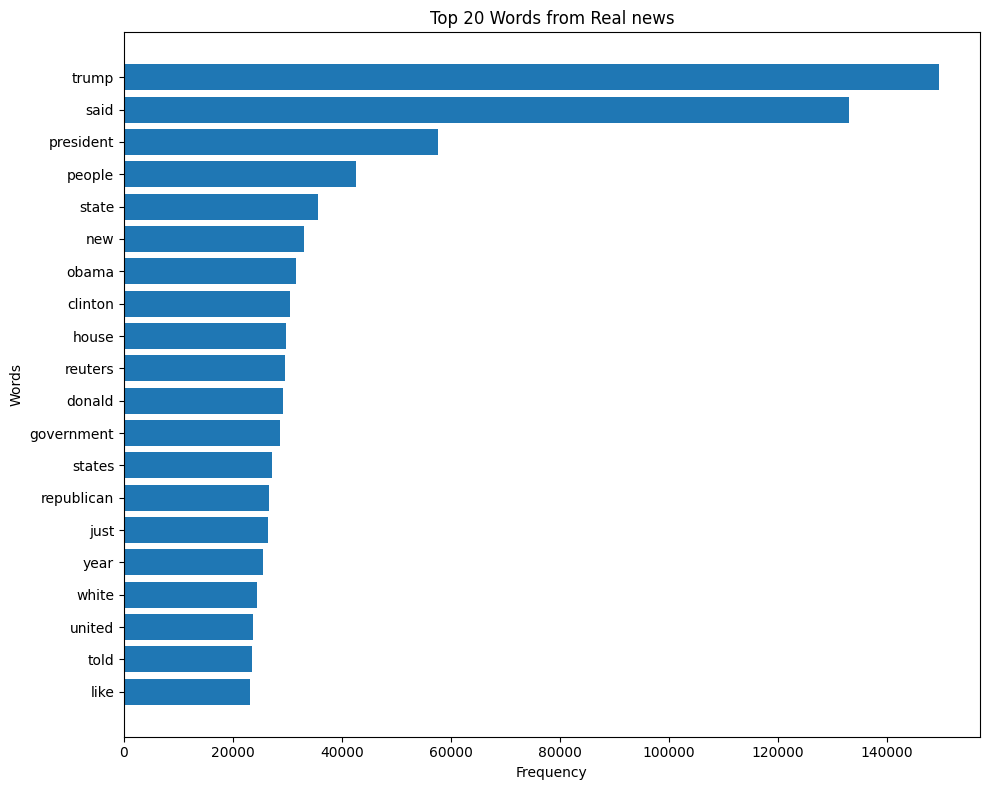

In [9]:
# Create a Bar Plot
plt.figure(figsize=(10, 8))
plt.barh(df_top20['Word'], df_top20['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words from Real news')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Generate association rules out of the frequent Itemsets

In [35]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
print(f"{len(rules)} rules generated.")
rules_sorted = rules.sort_values(by='confidence', ascending=False)
rules_sorted

327 rules generated.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
257,"(wire, tv, st)",(century),0.254147,1.000000,0.251945,0.991334,0.991334,1.0,-0.002202,1.883248e-12,-0.011585,0.251391,-5.309975e+11,0.621640
194,"(north, nuclear, missile)",(korea),0.240234,1.000000,0.237055,0.986767,0.986767,1.0,-0.003179,6.963666e-13,-0.017344,0.236304,-1.436025e+12,0.611911
180,"(north, nuclear, korean)",(korea),0.259535,1.000000,0.254758,0.981596,0.981596,1.0,-0.004776,5.007041e-13,-0.024695,0.253547,-1.997188e+12,0.618177
7,"(image, featured, getty)",(images),0.342949,1.000000,0.336168,0.980227,0.980227,1.0,-0.006781,-3.885513e-12,-0.029786,0.333903,2.573663e+11,0.658197
88,"(trump, getty)",(images),0.214992,1.000000,0.210545,0.979314,0.979314,1.0,-0.004447,-3.713927e-12,-0.026203,0.209612,2.692568e+11,0.594929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,"(twitter, https)","(pic, com)",0.287470,0.728939,0.202226,0.703468,0.965057,1.0,-0.007322,9.141023e-01,-0.048359,0.248379,-9.396940e-02,0.490446
103,"(trump, house)",(donald),0.325608,1.000000,0.228962,0.703183,0.703183,1.0,-0.096646,6.571940e-13,-0.384957,0.208784,-1.521621e+12,0.466073
317,"(putin, russia)",(russian),0.338998,1.000000,0.238219,0.702715,0.702715,1.0,-0.100779,-4.929596e-14,-0.390250,0.216410,2.028564e+13,0.470467
211,"(including, reuters)",(said),0.290884,1.000000,0.204284,0.702289,0.702289,1.0,-0.086599,-6.309793e-13,-0.374143,0.188003,1.584838e+12,0.453287


### Scatterplot of the rules was generated (between support and confidence)

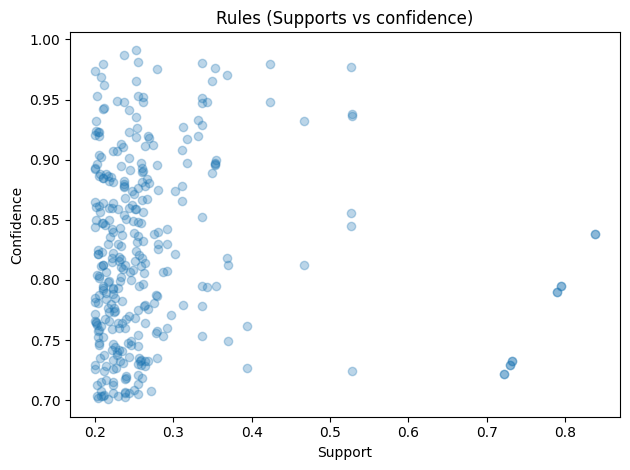

In [36]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.3)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Rules (Supports vs confidence)')
plt.gca()
plt.tight_layout()

## Analyze the association rules based on top words of fake and true news:
- Find unique sets of top words for both the fake the true news and filter the association rules based on them.
- the following top fake and real words are *derived* from top_20_fake & top_20_true files

Unique Top Real Words Set:

In [37]:
from common_words import get_pure_top_real_words_set
pure_real_set = get_pure_top_real_words_set()
pure_real_set

{'called',
 'country',
 'election',
 'government',
 'house',
 'including',
 'minister',
 'national',
 'republican',
 'reuters',
 'security',
 'state',
 'statement',
 'states',
 'thursday',
 'tuesday',
 'united',
 'wednesday',
 'week',
 'years'}

Unique Top Fake Words Set:

In [38]:
from common_words import get_pure_top_fake_words_set
pure_fake_set = get_pure_top_fake_words_set()
pure_fake_set

{'america',
 'american',
 'don',
 'featured',
 'going',
 'image',
 'just',
 'know',
 'like',
 'make',
 'news',
 'obama',
 'right',
 'say',
 'statehouse',
 'video',
 'watch',
 'way',
 'white'}

### Association Rules More related to fake news

In [69]:
mask_col1 = rules["antecedents"].apply(lambda x: not pure_fake_set.isdisjoint(x))
mask_col2 = rules["consequents"].apply(lambda x: not pure_fake_set.isdisjoint(x))

most_likely_fake_rules = rules[mask_col1 & mask_col2]
most_likely_fake_rules.sample(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
56,"(like, featured)",(image),0.343032,1.000000,0.311615,0.908415,0.908415,1.0,-0.031417,6.400586e-13,-0.133043,0.302124,-1.562357e+12,0.610015
10,"(image, getty)","(images, featured)",0.361822,0.446223,0.336168,0.929097,2.082134,1.0,0.174714,7.810334e+00,0.814386,0.712404,8.719645e-01,0.841229
20,"(donald, trump, image)",(featured),0.264210,1.000000,0.243972,0.923402,0.923402,1.0,-0.020238,1.968305e-12,-0.101316,0.239133,-5.080513e+11,0.583687
39,"(image, right)",(featured),0.306577,1.000000,0.265979,0.867576,0.867576,1.0,-0.040598,1.138527e-12,-0.180409,0.255602,-8.783276e+11,0.566778
5,"(image, images, getty)",(featured),0.353245,1.000000,0.336168,0.951656,0.951656,1.0,-0.017077,3.118671e-12,-0.072825,0.330523,-3.206494e+11,0.643912
46,"(video, featured)",(image),0.286800,1.000000,0.247335,0.862396,0.862396,1.0,-0.039465,4.260024e-13,-0.182823,0.237945,-2.347405e+12,0.554866
16,"(don, image)",(featured),0.270157,1.000000,0.237058,0.877481,0.877481,1.0,-0.033099,1.230575e-12,-0.160587,0.229463,-8.126281e+11,0.557270
58,"(featured, make)",(image),0.253331,1.000000,0.223381,0.881776,0.881776,1.0,-0.029950,4.958351e-13,-0.152230,0.216886,-2.016800e+12,0.552579
36,"(featured, images)",(image),0.446223,1.000000,0.354879,0.795295,0.795295,1.0,-0.091344,2.863628e-13,-0.317312,0.325177,-3.492073e+12,0.575087
54,"(time, featured)",(image),0.256053,1.000000,0.233870,0.913364,0.913364,1.0,-0.022183,6.766224e-13,-0.113082,0.228794,-1.477929e+12,0.573617


### Association Rules More related to true news

In [70]:
mask_col1 = rules["antecedents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))
mask_col2 = rules["consequents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))

most_likely_true_rules = rules[mask_col1 | mask_col2]
most_likely_true_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
89,"(united, foreign)",(states),0.280871,1.0,0.222544,0.792335,0.792335,1.0,-0.058327,1.956715e-13,-0.267108,0.210279,-5.110605e+12,0.507439
90,"(states, foreign)",(united),0.245222,1.0,0.222544,0.907519,0.907519,1.0,-0.022678,-1.001208e-12,-0.118953,0.217609,9.987939e+11,0.565031
94,"(election, donald)",(trump),0.282810,1.0,0.222882,0.788100,0.788100,1.0,-0.059928,4.338191e-13,-0.272675,0.210281,-2.305108e+12,0.505491
95,"(election, trump)",(donald),0.311779,1.0,0.222882,0.714872,0.714872,1.0,-0.088897,6.841362e-13,-0.366904,0.204686,-1.461697e+12,0.468877
101,"(white, donald)",(house),0.289482,1.0,0.223987,0.773749,0.773749,1.0,-0.065496,1.540813e-13,-0.291555,0.210218,-6.490079e+12,0.498868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,"(trump, reuters)",(said),0.280957,1.0,0.217354,0.773617,0.773617,1.0,-0.063604,-8.297882e-13,-0.289253,0.204356,1.205127e+12,0.495485
309,"(new, reuters)",(said),0.323589,1.0,0.241838,0.747361,0.747361,1.0,-0.081751,-7.435506e-13,-0.333225,0.223561,1.344898e+12,0.494599
310,"(reuters, people)",(said),0.265344,1.0,0.214082,0.806812,0.806812,1.0,-0.051261,-9.723676e-13,-0.245812,0.203643,1.028418e+12,0.510447
311,"(reuters, president)",(said),0.384918,1.0,0.296806,0.771090,0.771090,1.0,-0.088112,-8.206257e-13,-0.325529,0.272772,1.218582e+12,0.533948


## Results:
### Selected Top 5 Association Rules

In [71]:
# most likely related to fake news
# (image, images, getty) ---> (featured)
most_likely_fake_rules.loc[5]

antecedents           (image, images, getty)
consequents                       (featured)
antecedent support                  0.353245
consequent support                       1.0
support                             0.336168
confidence                          0.951656
lift                                0.951656
representativity                         1.0
leverage                           -0.017077
conviction                               0.0
zhangs_metric                      -0.072825
jaccard                             0.330523
certainty               -320649360817.892517
kulczynski                          0.643912
Name: 5, dtype: object

In [72]:
# most likely related to fake news
# (video, featured) ---> (image)
most_likely_fake_rules.loc[46]

antecedents             (video, featured)
consequents                       (image)
antecedent support                 0.2868
consequent support                    1.0
support                          0.247335
confidence                       0.862396
lift                             0.862396
representativity                      1.0
leverage                        -0.039465
conviction                            0.0
zhangs_metric                   -0.182823
jaccard                          0.237945
certainty            -2347404767654.73291
kulczynski                       0.554866
Name: 46, dtype: object

In [73]:
# most likely related to true news
# (states, reuters) ---> (united)	
most_likely_true_rules.loc[280]

antecedents              (states, reuters)
consequents                       (united)
antecedent support                0.322316
consequent support                     1.0
support                           0.256198
confidence                        0.794868
lift                              0.794868
representativity                       1.0
leverage                         -0.066117
conviction                            -0.0
zhangs_metric                    -0.275789
jaccard                            0.24031
certainty             2215429549878.600586
kulczynski                        0.525533
Name: 280, dtype: object

In [74]:
# most likely related to true news
# (white, administration) ---> (house)	
most_likely_true_rules.loc[217]

antecedents           (white, administration)
consequents                           (house)
antecedent support                   0.252063
consequent support                        1.0
support                              0.213081
confidence                           0.845348
lift                                 0.845348
representativity                          1.0
leverage                            -0.038982
conviction                                0.0
zhangs_metric                       -0.196528
jaccard                              0.205087
certainty               -4436242355581.837891
kulczynski                           0.529215
Name: 217, dtype: object

In [75]:
# most likely related to true news
# (government, reuters) ---> (said)
most_likely_true_rules.loc[208]

antecedents           (government, reuters)
consequents                          (said)
antecedent support                  0.35679
consequent support                      1.0
support                            0.254465
confidence                         0.713206
lift                               0.713206
representativity                        1.0
leverage                          -0.102325
conviction                             -0.0
zhangs_metric                     -0.384682
jaccard                            0.230844
certainty              1526719611254.418457
kulczynski                         0.483836
Name: 208, dtype: object

## Summary

* Some of the words at the antecedent and consequent of these rules are belonging to both the popular words of Fake and Real News.  for example the word "said" or "trump". Also the words are part of multiple news subjects like "featured" in (news) subject, and "government" in (government news) subjects".

* Some recommendations based on the discovered rule that might help understanding and identifying fake news from true news:
    * if a news record satisfies one of the following rules, there is a good chance it is true news:
    (We picked the previous rules because they contains formal news words and a name of well known news agency.)
        - (states, reuters)	---> (united)	
        - (white, administration) ---> (house)
        - (government, reuters)	---> (said)
    * if a news record satisfies one of the following rules,  there is a good chance it is fake news: 
        - (image, images, getty) ---> (featured)
        - (video, featured) ---> (image)